Graphing Fireams in America


Team members Tulgaa, Mike, Enerel and Gene into Github account https://github.com/vabigdatamover/dream-team

Graph 1 Permit BarLine Graph
Graph 2 Handguns Bar Graph
Graph 3 Long Guns Bar Graph
Graph 4 Scatter Plots with population

In [1]:
#Variable, dependables and setup
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
#State Coords
# File to Load 
state_coord_to_load = "input/state_coord.csv"

# Read the firearms data
coord_data = pd.read_csv(state_coord_to_load)
coord_data.head()

,state,latitude,longitude
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564


In [3]:
#World Atlas.COM
# File to Load 
state_population_to_load = "input/state_populations.csv"

# Read the firearms data
population_data = pd.read_csv(state_population_to_load)
population_data.head()

,pop_rank,state,population
0,1,California,"39,536,653"
1,2,Texas,"28,304,596"
2,3,Florida,"20,984,400"
3,4,New York,"19,849,399"
4,5,Pennsylvania,"12,805,537"


In [4]:
# File to Load 
fireams_data_to_load = "input/nics-firearm-background-checks.csv"

# Read the firearms data
firearms_data = pd.read_csv(fireams_data_to_load)
firearms_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-06,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,0.0,19.0,...,0.0,0.0,0.0,10.0,11.0,1.0,0.0,0.0,1.0,42898
1,2019-06,Alaska,251.0,6.0,2465.0,2000.0,239.0,182,0.0,0.0,...,0.0,0.0,0.0,14.0,12.0,2.0,0.0,0.0,0.0,5557
2,2019-06,Arizona,5371.0,438.0,11375.0,5931.0,1309.0,656,0.0,14.0,...,4.0,0.0,0.0,13.0,7.0,5.0,2.0,0.0,0.0,26746
3,2019-06,Arkansas,2690.0,559.0,4653.0,3214.0,292.0,458,8.0,11.0,...,0.0,0.0,0.0,9.0,10.0,1.0,0.0,2.0,0.0,13956
4,2019-06,California,39303.0,0.0,38712.0,27050.0,4856.0,0,5040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115987


In [11]:
# Combine the data into a single dataset with a left merge on "state"
data_pair = pd.merge(firearms_data, population_data, how="left", on=["state", "state"])
data_complete = pd.merge(data_pair, coord_data, how="left", on=["state", "state"])
data_complete.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,pop_rank,population,latitude,longitude
0,2019-06,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,0.0,19.0,...,11.0,1.0,0.0,0.0,1.0,42898,24.0,"4,874,747",32.806671,-86.791130
1,2019-06,Alaska,251.0,6.0,2465.0,2000.0,239.0,182,0.0,0.0,...,12.0,2.0,0.0,0.0,0.0,5557,48.0,"739,795",61.370716,-152.404419
2,2019-06,Arizona,5371.0,438.0,11375.0,5931.0,1309.0,656,0.0,14.0,...,7.0,5.0,2.0,0.0,0.0,26746,14.0,"7,016,270",33.729759,-111.431221
3,2019-06,Arkansas,2690.0,559.0,4653.0,3214.0,292.0,458,8.0,11.0,...,10.0,1.0,0.0,2.0,0.0,13956,32.0,"3,004,279",34.969704,-92.373123
4,2019-06,California,39303.0,0.0,38712.0,27050.0,4856.0,0,5040.0,0.0,...,0.0,0.0,0.0,0.0,0.0,115987,1.0,"39,536,653",36.116203,-119.681564


Mike adjust code
# Creating a subset DataFrame
heat_data = pd.DataFrame(data_complete,
                           columns=['month', 'state', 'totals', 'latitude', 'longitude'])

heat_map=heat_data
heat_map.head()

Mike Adjust code
# Grouping the results by month
heat_map_mo = heat_map.groupby(['month'])

heat_total=heat_map_mo['totals'].sum()

heat_total.head()


Mike adjust code

#Data source
ctyps = ['Urban','Suburban','Rural']
for x in ctyps:
   filtered_city_summary = city_summary[city_summary['City Type']==x]
   x = filtered_city_summary['Total Rides']
   y = filtered_city_summary['Average Fare']
   z = filtered_city_summary['Total Drivers']
   #for color per city type:
   c = np.where(filtered_city_summary["City Type"]=='Urban','pink',
            (np.where(filtered_city_summary['City Type']=='Suburban','lightskyblue', 'y')))
   plt.scatter(x, y, s=z*10, alpha=0.5, facecolors= c, edgecolors="black" )

In [15]:
firearms_2017 = data_complete[data_complete['month'].str.contains('2017')]
firearms_2017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,pop_rank,population,latitude,longitude
990,2017-12,Alabama,24496.0,0.0,12895.0,15765.0,390.0,513,0.0,16.0,...,29.0,4.0,0.0,0.0,0.0,56545,24.0,"4,874,747",32.806671,-86.791130
991,2017-12,Alaska,249.0,3.0,3675.0,3524.0,287.0,174,0.0,4.0,...,27.0,4.0,0.0,0.0,0.0,8330,48.0,"739,795",61.370716,-152.404419
992,2017-12,Arizona,6243.0,415.0,17566.0,12840.0,1414.0,784,0.0,14.0,...,25.0,3.0,1.0,1.0,1.0,41559,14.0,"7,016,270",33.729759,-111.431221
993,2017-12,Arkansas,3339.0,590.0,9189.0,13104.0,347.0,440,40.0,8.0,...,32.0,4.0,0.0,0.0,0.0,29559,32.0,"3,004,279",34.969704,-92.373123
994,2017-12,California,53885.0,0.0,47613.0,35240.0,4885.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,142492,1.0,"39,536,653",36.116203,-119.681564


In [20]:
#sum handguns by state
state_handguns_sum = firearms_2017.groupby(['state'])['handgun'].sum()
handgun_df = pd.DataFrame([state_handguns_sum]).T
handgun_df['state'] = handgun_df.index
#handgun_df.head()
state_handguns_sum.head()

state
Alabama        97751.0
Alaska         34556.0
Arizona       153522.0
Arkansas       72100.0
California    512465.0
Name: handgun, dtype: float64

In [8]:
ax1 = handgun_df.plot.barh(x='state', y='handgun',figsize=(10,9), legend=False)

# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Handgun Sales Per State 2017')
plt.xlabel('Hundred Thousand')
plt.ylabel('State')
plt.savefig('output/handguns2017.png', bbox_inches="tight")

KeyError: 'state'

In [14]:
#sum longguns by state
state_longguns_sum = firearms_2017.groupby(['state'])['long_gun'].sum()
longgun_df = pd.DataFrame([state_longguns_sum]).T
longgun_df['state'] = df.index
longgun_df.head()

NameError: name 'df' is not defined

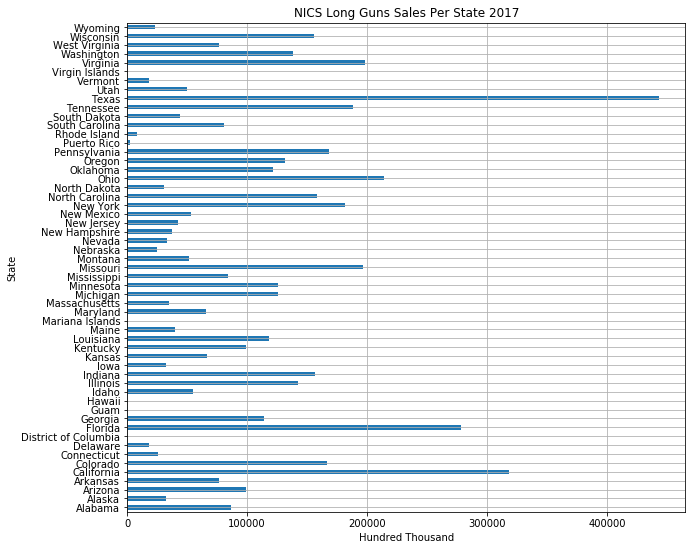

In [280]:
ax1 = longgun_df.plot.barh(x='state', y='long_gun',figsize=(10,9), legend=False)

# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Long Guns Sales Per State 2017')
plt.xlabel('Hundred Thousand')
plt.ylabel('State')
plt.savefig('output/longguns2017.png', bbox_inches="tight")
plt.show()

In [281]:
#sum Permits by state
state_permits_sum = firearms_2017.groupby(['state'])['permit'].sum()
permit_df = pd.DataFrame([state_permits_sum]).T
permit_df['state'] = df.index
permit_df.head()

,permit,state
state,,
Alabama,253338.0,Alabama
Alaska,2923.0,Alaska
Arizona,81734.0,Arizona
Arkansas,39473.0,Arkansas
California,689851.0,California


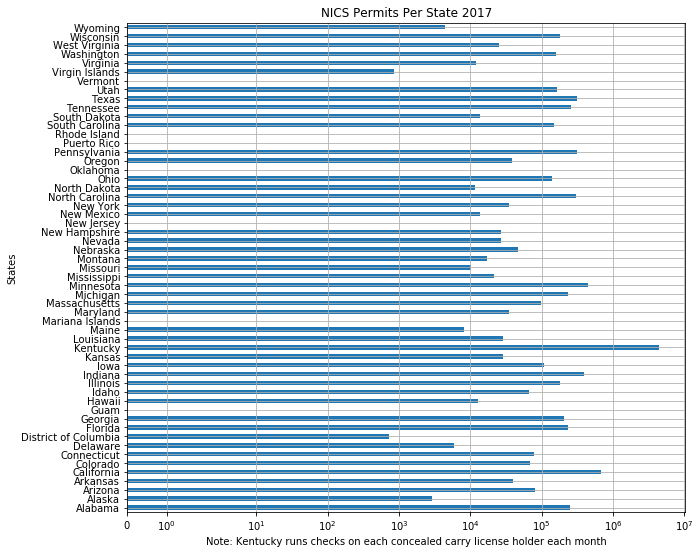

<Figure size 432x288 with 0 Axes>

In [282]:
ax1 = permit_df.plot.barh(x='state', y='permit',figsize=(10,9), legend=False)
#Kentucky runs a new check on each concealed carry license holder each month. 
# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Permits Per State 2017')
plt.xlabel('Note: Kentucky runs checks on each concealed carry license holder each month')
plt.ylabel('States')
#plt.xticks([0,100,1000,10000000])
plt.xscale('symlog')
plt.show()
plt.savefig('output/permits2017.png', bbox_inches="tight")

In [163]:
print(population_data[population_data["state"] == "Texas"]['population'])
population_data.head()

1    28,304,596
Name: population, dtype: object


,pop_rank,state,population
0,1,California,"39,536,653"
1,2,Texas,"28,304,596"
2,3,Florida,"20,984,400"
3,4,New York,"19,849,399"
4,5,Pennsylvania,"12,805,537"


(Gene) .csv Firearms graphs

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/20/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

Perform ####### (Tulgaa) API Calls

Perform ####### (Mike) API Calls
